In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# importing the saved csv

df = pd.read_csv('cleaned_df.csv')
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,hour_of_day,month,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400.0,0,16,2,1,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,4,23,3,1,0
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,6,17,2,1,0
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,1,9,1,1,0
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848.0,2,6,2,1,0


In [4]:
# segregating dependent and independent variables

x = df.drop(['trip_duration'] , axis = 1)
y = df['trip_duration']
x.shape , y.shape

((729287, 11), (729287,))

In [7]:
# diving the data into train and test sets

from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y , random_state = 45)
train_x.shape , train_y.shape , test_x.shape , test_y.shape

((546965, 11), (546965,), (182322, 11), (182322,))

In [8]:
# importing Decision Tree module from sklearn

from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(criterion = 'mse' , random_state = 45)

In [9]:
# training our model

dt_model.fit(train_x , train_y)
test_pred = dt_model.predict(test_x)

In [10]:
# Importing evaluation metrics

from sklearn.metrics import mean_squared_error as mse
error = np.sqrt(mse(test_pred , test_y))
print("RMSE for our model is : " , error)

RMSE for our model is :  420.64901342930335


In [12]:
# This model is even better than our knn model. We are getting less error than that model.
# Let's try to get it down even more.


In [13]:
# We will try to change some hyperparameters so as to evaluate more further.

In [14]:
# importing pprint to show the hyperparameters of decision tree.

from pprint import pprint
print('Parameters currently in use :\n')
pprint(dt_model.get_params())

Parameters currently in use :

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 45,
 'splitter': 'best'}


In [27]:
train_acc = []
test_acc = []
for depth in range(1,25):
    dt_model = DecisionTreeRegressor(max_depth = depth , random_state = 45)
    dt_model.fit(train_x , train_y)
    pred_train = dt_model.predict(train_x)
    error_train = np.sqrt(mse(pred_train , train_y))
    pred_test = dt_model.predict(test_x)
    error_test = np.sqrt(mse(pred_test , test_y))
    train_acc.append(error_train)
    test_acc.append(error_test)

In [28]:
frame = pd.DataFrame({'max_depth':range(1,25) , 'train_acc':train_acc , 'test_acc':test_acc})
frame.head()

,max_depth,train_acc,test_acc
0,1,570.714195,572.200304
1,2,526.151835,528.665194
2,3,503.817261,506.902476
3,4,486.953600,489.753083
4,5,473.326644,476.177280


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Performance')

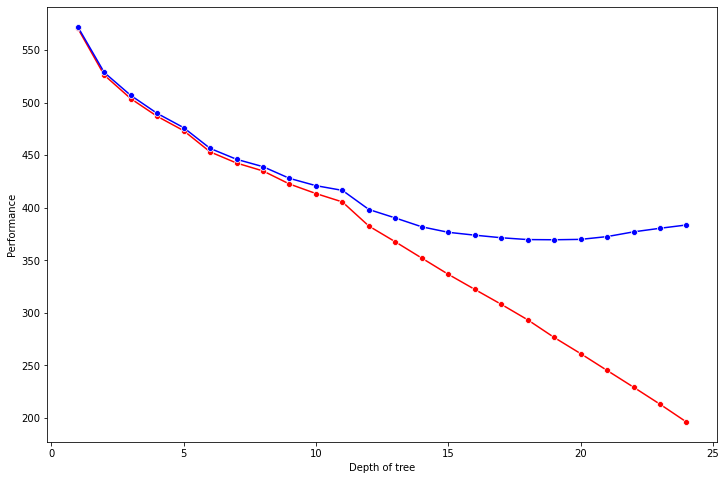

In [29]:
plt.figure(figsize = (12,8))
sns.lineplot(frame['max_depth'] , frame['train_acc'] , color = 'r' , marker = 'o')
sns.lineplot(frame['max_depth'] , frame['test_acc'] , color = 'b' , marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')

In [30]:
# from the graph above, we can take the value of depth_of_tree = 12

In [54]:
train_acc = []
test_acc = []
for sample in range(2,500 , 50):
    dt_model = DecisionTreeRegressor(min_samples_split = sample , random_state = 45)
    dt_model.fit(train_x , train_y)
    pred_train = dt_model.predict(train_x)
    error_train = np.sqrt(mse(pred_train , train_y))
    pred_test = dt_model.predict(test_x)
    error_test = np.sqrt(mse(pred_test , test_y))
    train_acc.append(error_train)
    test_acc.append(error_test)

In [55]:
frame_2 = pd.DataFrame({'min_sample_split':range(2,500 , 50) , 'train_acc':train_acc , 'test_acc':test_acc})
frame_2.head()

,min_sample_split,train_acc,test_acc
0,2,1.006969,420.649013
1,52,257.416182,338.132117
2,102,282.742251,330.313973
3,152,295.865899,330.232778
4,202,303.999309,331.428110


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Performance')

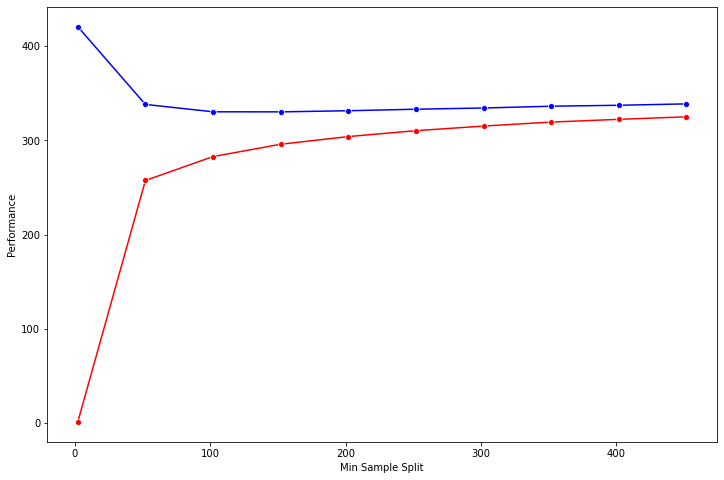

In [56]:
plt.figure(figsize = (12,8))
sns.lineplot(frame_2['min_sample_split'] , frame_2['train_acc'] , color = 'r' , marker = 'o')
sns.lineplot(frame_2['min_sample_split'] , frame_2['test_acc'] , color = 'b' , marker = 'o')
plt.xlabel('Min Sample Split')
plt.ylabel('Performance')

In [57]:
# Seems like we need to take min sample split value = 100

In [59]:
# Altering both these parameter and checking for error value
dt_model = DecisionTreeRegressor(max_depth = 12 , min_samples_split = 100 , random_state = 45)

In [60]:
dt_model.fit(train_x , train_y)
test_pred = dt_model.predict(test_x)
error = np.sqrt(mse(test_pred , test_y))
print('RMSE after parameters updation is :' , error)

RMSE after parameters updation is : 395.85945726342396


In [61]:
# Yes!! we brought down the error of our model.

In [62]:
# Let's now print out the decision tree model

In [63]:
from sklearn import tree

In [64]:
#!pip install graphviz

In [66]:
decision_tree = tree.export_graphviz(dt_model , out_file = 'tree.dot' , feature_names = train_x.columns , max_depth = 3 , filled = True)

In [67]:
!dot -Tpng tree.dot -o tree.png

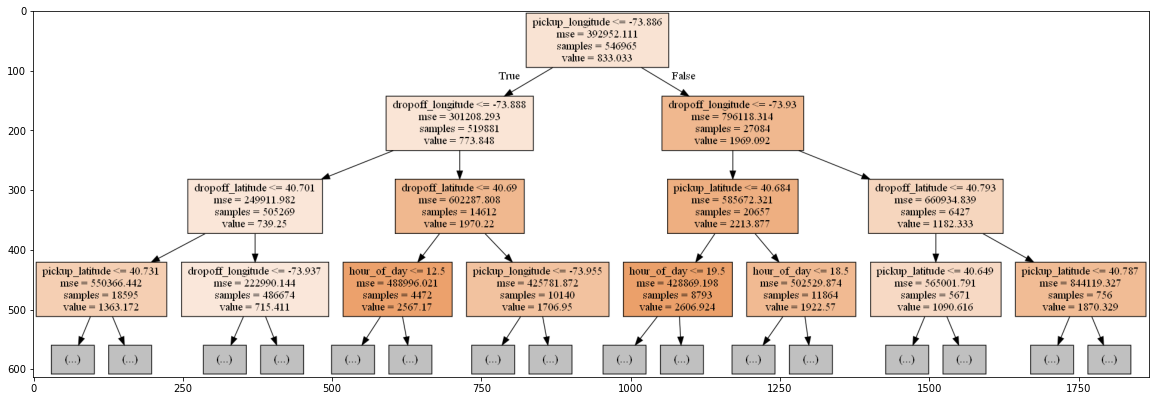

In [69]:
image = plt.imread('tree.png')
plt.figure(figsize = (20,15))
plt.imshow(image)